## Lab 08 - Distances and PCA
Name: Dempsey Wade 
Class: CSCI 349 - Intro to Data Mining 
Semester: 2019SP 
Instructor: Brian King

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from pandas import Categorical
from sklearn.preprocessing import MinMaxScaler

### 1) [P] You will compute the distance matrix for data that is similar to a simple set shown in class, just a bit more extensive. This will give you an opportunity to understand how to perform proximity measurements on data with different types of variables on your own. First, set up a pandas data frame with the following 8 observations and 3 variables:

#### test1: Nominal, levels = { "A", "B", C" }
#### test2: Ordinal, levels = { "poor", "fair", "good", "excellent")
#### test3: Numeric

#### Name the data frame df. Set the index correctly. Use the info() method to show the type of each variable in df when you have completed your dataframe.

In [2]:
d = {'test1': ['A', 'C','C','B','A','B','C','B'], 'test2': ['excellent', 'fair', 'good', 'fair', 'poor', 'excellent', 'good', 'good'], 'test3': [25, 32, 60, 53, 23, 37, 45, 49]}
df = pd.DataFrame(data=d, index = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8'])
df

,test1,test2,test3
A1,A,excellent,25
A2,C,fair,32
A3,C,good,60
A4,B,fair,53
A5,A,poor,23
A6,B,excellent,37
A7,C,good,45
A8,B,good,49


### 2) [P] Report the counts of each level of the categorical variables.

In [3]:
print(df.test1.value_counts())
print(df.test2.value_counts())

C    3
B    3
A    2
Name: test1, dtype: int64
good         3
fair         2
excellent    2
poor         1
Name: test2, dtype: int64


### 3) [P] Report a cross tabulation (i.e. contingency table) between test1 and test2. Include the margins (i.e. the sum of the rows and the columns) in your reported table (HINT: Look up pandas crosstab() function)

In [4]:
pd.crosstab(df['test1'], df['test2'], margins = True)

test2,excellent,fair,good,poor,All
test1,,,,,
A,1,0,0,1,2
B,1,1,1,0,3
C,0,1,2,0,3
All,2,2,3,1,8


### 4) [P] From the previous table, store the contingency table without the margins in a variable called observed

In [5]:
observed = pd.crosstab(df['test1'], df['test2'])
observed

test2,excellent,fair,good,poor
test1,,,,
A,1,0,0,1
B,1,1,1,0
C,0,1,2,0


### 5) [P] Run a chi-squared test for independence using the contingency table from the previous step. Clearly report the chi2 statistic, the p value, and the degrees of freedom, and then use the p-value to clearly state whether test1 and test2 are independent.

In [6]:
chi = sp.stats.chi2_contingency(observed)

print('chi2 statistic:', chi[0])
print('pvalue:', chi[1])
print('degrees of freedom:', chi[2])

chi2 statistic: 6.444444444444444
pvalue: 0.37528525266160834
degrees of freedom: 6


With a pvalue of 0.135, we can conclude that test1 and test2 are dependant.

### 6) [P] Use describe() to report the summary statistics of variable test3.

In [7]:
df['test3'].describe()

count     8.000000
mean     40.500000
std      13.416408
min      23.000000
25%      30.250000
50%      41.000000
75%      50.000000
max      60.000000
Name: test3, dtype: float64

### 7) [P] Now, you're going to explore some similarities between observations. Yes, this is a SMALL dataset! (Don't bother to explore large data until you can understand how they work on small, toy experimental data!)

### Before you can compute a pairwise distance matrix to report the distance between all pairs of observations, always remember that you can only compute distances between strictly numeric data. Therefore, you must convert your data to numeric types for ALL variables you want to include in your distance metric.

### Create a new data frame called df_num, that represents a numeric version of the above. Let's begin by creating a version that stores all three variables above encoded as simple as possible. Do NOT rescale your data... yet!

### NOTE: If you do this from a dataframe that has the categorical variables set up properly, then this step is simple to do. The two choices I generally follow are either: 1) use the cat member of your categorical data, which stores a CategoricalAccessor object (look it up), or use one of the encoders in the sklearn.preprocessing module. The first option is easier, and yet another reason why it's so important to take the time to preprocess your data as correctly and error-free as possible.

### Your resulting data frame at the end of this step should be as follows:

In [8]:
df_num = df.astype('category')
print(df_num)
#dict(enumerate(df_cat['test1'].cat.categories))
df_num['test1'] = df_num['test1'].cat.set_categories([0, 1, 2], rename = True)

categories = {0: 'fair', 1:'poor', 2:'good', 3:'excellent'}
#dict(enumerate(df_cat['test2'].cat.categories))
df_num['test2'] = df_num['test2'].cat.set_categories([3, 1, 2, 0], rename = True)

df_num

   test1      test2 test3
A1     A  excellent    25
A2     C       fair    32
A3     C       good    60
A4     B       fair    53
A5     A       poor    23
A6     B  excellent    37
A7     C       good    45
A8     B       good    49


,test1,test2,test3
A1,0,3,25
A2,2,1,32
A3,2,2,60
A4,1,1,53
A5,0,0,23
A6,1,3,37
A7,2,2,45
A8,1,2,49


### 8) [P] As you learned in lecture, you absolutely must rescale your data to fall on a similar scale. There are different approaches to doing so. A standardized zscore is among the most common, but not necessarily always the best approach, especially when you are dealing with numeric representations of true categorical data. Rescaling your data to all fall between 0 and 1 is also a common approach, particularly when you have categorical data.

### Let's first try to rescale our data to all fall between the values of 0 and 1. Use the MinMaxScaler in sklearn.preprocessing to rescale all variables to fall between 0 and 1. Store the transformed data as a pandas data frame called df_num_zeroone,. Your result should look as follows:

In [9]:
scaler = MinMaxScaler()
#df_num_zeroone = pd.DataFrame
df_num_zeroone = df_num
df_num_zeroone['test1'] = scaler.fit_transform(df_num[['test1']])
df_num_zeroone['test2'] = scaler.fit_transform(df_num[['test2']])
df_num_zeroone['test3'] = scaler.fit_transform(df_num[['test3']])
df_num_zeroone

,test1,test2,test3
A1,0.0,1.000000,0.054054
A2,1.0,0.333333,0.243243
A3,1.0,0.666667,1.000000
A4,0.5,0.333333,0.810811
A5,0.0,0.000000,0.000000
A6,0.5,1.000000,0.378378
A7,1.0,0.666667,0.594595
A8,0.5,0.666667,0.702703


### 9) [P] Notice the value of test3. Quite often, when we have solid knowledge of what we expect our range to be, then we can rescale our data using that knowledge. In the case of test3, you learned that the data must fall between 0 and 100. Therefore, reassign test3 so that the min and max before rescaling are assuming to be between 0 and 100, respectively. (i.e. simply divide the original variable by 100!)

In [10]:
df_num_zeroone['test3'] = df['test3']/100
df_num_zeroone

,test1,test2,test3
A1,0.0,1.000000,0.25
A2,1.0,0.333333,0.32
A3,1.0,0.666667,0.60
A4,0.5,0.333333,0.53
A5,0.0,0.000000,0.23
A6,0.5,1.000000,0.37
A7,1.0,0.666667,0.45
A8,0.5,0.666667,0.49


### 10) [P] Compute a single distance matrix called distmat_zeroone. Use a standard Euclidean distance measure. Your reported result should be an 8x8 matrix with appropriately labeled rows and columns. (HINT – study the output of the distance matrix functions! They do not output a square matrix. Look at the squareform function. The pdist and squareform functions are in scipy.spatial.distance).

In [11]:
from scipy.spatial import distance_matrix
from scipy.spatial import distance

In [12]:
distmat_zeroone = distance.cdist(df_num_zeroone, df_num_zeroone, metric = 'euclidean')

In [13]:
distmat_zeroone = pd.DataFrame(distmat_zeroone, index=df.index, columns=df.index)
distmat_zeroone

,A1,A2,A3,A4,A5,A6,A7,A8
A1,0.000000,1.203887,1.110680,0.879116,1.000200,0.514198,1.072898,0.647079
A2,1.203887,0.000000,0.435329,0.542310,1.057928,0.834832,0.357786,0.624509
A3,1.110680,0.435329,0.000000,0.604989,1.257515,0.643437,0.150000,0.511957
A4,0.879116,0.542310,0.604989,0.000000,0.671648,0.685598,0.606227,0.335725
A5,1.000200,1.057928,1.257515,0.671648,0.000000,1.126765,1.221820,0.872952
A6,0.514198,0.834832,0.643437,0.685598,1.126765,0.000000,0.606227,0.354275
A7,1.072898,0.357786,0.150000,0.606227,1.221820,0.606227,0.000000,0.501597
A8,0.647079,0.624509,0.511957,0.335725,0.872952,0.354275,0.501597,0.000000


### 11) [P] Output the top three closest pairs of observations. You MUST write Python code to report these results! Do not simply print out your distance matrix and tell me your answers! Consider that this may have been thousands of observations! Always generate reported answers in code!
#### For each pair, output the pair of observations from the original dataframe, and the distance between them.
#### For example, your first closest pair output might look like:

In [14]:
lb = distmat_zeroone[distmat_zeroone != 0.0]
rowcol = []
smallest = []
smallest.append(lb.min().min())
col1 = lb.min().idxmin()
row1 = lb[col1].idxmin()
rowcol.append((row1, col1))

lb = lb[lb != smallest[0]]
smallest.append(lb.min().min())
col2 = lb.min().idxmin()
row2 = lb[col2].idxmin()
rowcol.append((row2, col2))

lb = lb[lb != smallest[1]]
smallest.append(lb.min().min())
col3 = lb.min().idxmin()
row3 = lb[col2].idxmin()
rowcol.append((row3, col3))
print(smallest)

#df.loc[df[row1][row2]]

myarray = [smallest[0], smallest[1], smallest[2]]
for i in range(len(myarray)):
    print("Closest #" + str(i) + ":" + str(rowcol[i]) + "distance = " + str(smallest[i]))
    print(df.loc[rowcol[i][0]])
    print(df.loc[rowcol[i][1]])
    print()

[0.14999999999999997, 0.33572475498704457, 0.35427547348230465]
Closest #0:('A7', 'A3')distance = 0.14999999999999997
test1       C
test2    good
test3      45
Name: A7, dtype: object
test1       C
test2    good
test3      60
Name: A3, dtype: object

Closest #1:('A8', 'A4')distance = 0.33572475498704457
test1       B
test2    good
test3      49
Name: A8, dtype: object
test1       B
test2    fair
test3      53
Name: A4, dtype: object

Closest #2:('A2', 'A6')distance = 0.35427547348230465
test1       C
test2    fair
test3      32
Name: A2, dtype: object
test1            B
test2    excellent
test3           37
Name: A6, dtype: object



### 12) [P] Output the top three observations that are least similar, with the two most distant observations output first. Again, for each pair, output the two observations, and the distance between them

In [15]:
lb = distmat_zeroone[distmat_zeroone != 0.0]
rowcol = []
biggest = []
biggest.append(lb.max().max())
col1 = lb.max().idxmax()
row1 = lb[col1].idxmax()
rowcol.append((row1, col1))

lb = lb[lb != biggest[0]]
biggest.append(lb.max().max())
col2 = lb.max().idxmax()
row2 = lb[col2].idxmax()
rowcol.append((row2, col2))

lb = lb[lb != biggest[1]]
biggest.append(lb.max().max())
col3 = lb.max().idxmax()
row3 = lb[col2].idxmax()
rowcol.append((row3, col3))

#df.loc[df[row1][row2]]

myarray = [biggest[0], biggest[1], biggest[2]]
for i in range(len(myarray)):
    print("Furthest #" + str(i) + ":" + str(rowcol[i]) + "distance = " + str(biggest[i]))
    print(df.loc[rowcol[i][0]])
    print(df.loc[rowcol[i][1]])
    print()

Furthest #0:('A5', 'A3')distance = 1.2575151865661283
test1       A
test2    poor
test3      23
Name: A5, dtype: object
test1       C
test2    good
test3      60
Name: A3, dtype: object

Furthest #1:('A7', 'A5')distance = 1.2218201358810732
test1       C
test2    good
test3      45
Name: A7, dtype: object
test1       A
test2    poor
test3      23
Name: A5, dtype: object

Furthest #2:('A6', 'A1')distance = 1.2038872224774397
test1            B
test2    excellent
test3           37
Name: A6, dtype: object
test1            A
test2    excellent
test3           25
Name: A1, dtype: object



### 13) [P] Repeat that exercise, however, now follow a strict binarization approach. Recall what binarization is! For each categorical variable, create a new set of variables that will store the occurrence of a distinct value in that variable.

#### For example, test1 has three distinct values, "A", "B", and "C". Therefore, you should end up with three new variables that replace the one categorical variable. Best practice is to name your variables accordingly, with the variable name prefix, and the value as a suffix, usually with an _ in between. Thus, your result for the first variable should look like:

#### Do this for BOTH categorical variables test1, and test2. However, test3 is already numeric, and we scaled it between zero-one already. Thus just copy the result of test3 from the previous data frame from the zero-one scaling.

#### HINT - HOW? One approach is to use OneHotEncoder from sklearn.preprocessing. For this purpose, you can set the parameter sparse=False so that you can easily view the data, and set your dtype=int.

#### Another approach is to use the pandas function get_dummies().

In [16]:
df_first = pd.get_dummies(df.test1, prefix='test1')
df_second = pd.get_dummies(df.test2, prefix='test2')
temps = [df_first, df_second, df.test3/100]
df_dummies = pd.concat(temps, axis = 1)
df_dummies

,test1_A,test1_B,test1_C,test2_excellent,test2_fair,test2_good,test2_poor,test3
A1,1,0,0,1,0,0,0,0.25
A2,0,0,1,0,1,0,0,0.32
A3,0,0,1,0,0,1,0,0.60
A4,0,1,0,0,1,0,0,0.53
A5,1,0,0,0,0,0,1,0.23
A6,0,1,0,1,0,0,0,0.37
A7,0,0,1,0,0,1,0,0.45
A8,0,1,0,0,0,1,0,0.49


### 14) [P] Now, rerun your same exact results as with your zero-one scaled data. Report the three closest pairs, and the three most distant pairs.

In [17]:
x = distance.cdist(df_dummies, df_dummies, metric = 'euclidean')
dummies = pd.DataFrame(x, index=df.index, columns=df.index)
dummies

,A1,A2,A3,A4,A5,A6,A7,A8
A1,0.000000,2.001225,2.030394,2.019505,1.414355,1.419296,2.009975,2.014349
A2,2.001225,0.000000,1.441666,1.429720,2.002024,2.000625,1.420176,2.007212
A3,2.030394,1.441666,0.000000,2.001225,2.033937,2.013182,0.150000,1.418485
A4,2.019505,1.429720,2.001225,0.000000,2.022375,1.423236,2.001599,1.414779
A5,1.414355,2.002024,2.033937,2.022375,0.000000,2.004894,2.012064,2.016829
A6,1.419296,2.000625,2.013182,1.423236,2.004894,0.000000,2.001599,1.419296
A7,2.009975,1.420176,0.150000,2.001599,2.012064,2.001599,0.000000,1.414779
A8,2.014349,2.007212,1.418485,1.414779,2.016829,1.419296,1.414779,0.000000


In [18]:
lb = dummies[dummies != 0.0]
rowcol = []
biggest = []
biggest.append(lb.max().max())
col1 = lb.max().idxmax()
row1 = lb[col1].idxmax()
rowcol.append((row1, col1))

lb = lb[lb != biggest[0]]
biggest.append(lb.max().max())
col2 = lb.max().idxmax()
row2 = lb[col2].idxmax()
rowcol.append((row2, col2))

lb = lb[lb != biggest[1]]
biggest.append(lb.max().max())
col3 = lb.max().idxmax()
row3 = lb[col2].idxmax()
rowcol.append((row3, col3))

#df.loc[df[row1][row2]]

myarray = [biggest[0], biggest[1], biggest[2]]
for i in range(len(myarray)):
    print("Furthest #" + str(i) + ":" + str(rowcol[i]) + "distance = " + str(biggest[i]))
    print(df.loc[rowcol[i][0]])
    print(df.loc[rowcol[i][1]])
    print()

Furthest #0:('A5', 'A3')distance = 2.033937068839643
test1       A
test2    poor
test3      23
Name: A5, dtype: object
test1       C
test2    good
test3      60
Name: A3, dtype: object

Furthest #1:('A3', 'A1')distance = 2.0303940504246953
test1       C
test2    good
test3      60
Name: A3, dtype: object
test1            A
test2    excellent
test3           25
Name: A1, dtype: object

Furthest #2:('A4', 'A4')distance = 2.0223748416156684
test1       B
test2    fair
test3      53
Name: A4, dtype: object
test1       B
test2    fair
test3      53
Name: A4, dtype: object



In [19]:
lb = dummies[dummies != 0.0]
rowcol = []
smallest = []
smallest.append(lb.min().min())
col1 = lb.min().idxmin()
row1 = lb[col1].idxmin()
rowcol.append((row1, col1))

lb = lb[lb != smallest[0]]
smallest.append(lb.min().min())
col2 = lb.min().idxmin()
row2 = lb[col2].idxmin()
rowcol.append((row2, col2))

lb = lb[lb != smallest[1]]
smallest.append(lb.min().min())
col3 = lb.min().idxmin()
row3 = lb[col2].idxmin()
rowcol.append((row3, col3))
print(smallest)

#df.loc[df[row1][row2]]

myarray = [smallest[0], smallest[1], smallest[2]]
for i in range(len(myarray)):
    print("Closest #" + str(i) + ":" + str(rowcol[i]) + "distance = " + str(smallest[i]))
    print(df.loc[rowcol[i][0]])
    print(df.loc[rowcol[i][1]])
    print()

[0.14999999999999997, 1.4143549766589716, 1.4147791347061915]
Closest #0:('A7', 'A3')distance = 0.14999999999999997
test1       C
test2    good
test3      45
Name: A7, dtype: object
test1       C
test2    good
test3      60
Name: A3, dtype: object

Closest #1:('A5', 'A1')distance = 1.4143549766589716
test1       A
test2    poor
test3      23
Name: A5, dtype: object
test1            A
test2    excellent
test3           25
Name: A1, dtype: object

Closest #2:('A6', 'A4')distance = 1.4147791347061915
test1            B
test2    excellent
test3           37
Name: A6, dtype: object
test1       B
test2    fair
test3      53
Name: A4, dtype: object



### 15) [M] Take a moment and compare and contrast your results. Which method do you think have the better results? Why?

When I put my results in bins, I got better results. The evidence is in the test3 variable. The test results are closer together when I compute the shortest distance, and further apart when i compute the furthest distance. 

Since test3 is the variable I transformed the least, so I value that variable more over test1 and test2. 

### 16) [M] Which variable do you think was the distinguishing player in affecting the different outcomes between both of the above approaches to transforming your data to numeric results? Why?

test3 because it was inputted as numbers, so it underwent the least transformation. test3 also is the independent variable.

For this next exercise, you are going to use the dataset built into the seaborn library, called 'car_crashes'.

### 17) [P] Load in your next dataset using the following: df_car_crashes = sns.load_dataset('car_crashes')

The dataset is directly downloaded from:
https://github.com/mwaskom/seaborn-data/blob/master/car_crashes.csv
Figure out what this dataset is all about. Sometimes, it's easy to figure out. Just Google! And, sometimes we find interesting publicly available data and need to make the best guess regarding our variables. For now,
don't worry too much about specifics. This is a very simplified, highly aggregated dataset from much more extensive statistics drawn from the Insurance Institute for Highway Safety - https://www.iihs.org/iihs/topics/t/general-statistics/fatalityfacts/state-by-state-overview (NOTE - this might make a great repository for some project?)

In [20]:
df_car_crashes = sns.load_dataset('car_crashes')

### 18) [P] Preprocess your data. Minimally, you should move the state code to become the index for the dataframe, and then drop that column from your data.

In [21]:
df_car_crashes = sns.load_dataset('car_crashes')
df_car_crashes.index = df_car_crashes.abbrev
df_car_crashes = df_car_crashes.drop(['abbrev'], axis = 1)
df_car_crashes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,,
AL,18.8,7.332,5.640,18.048,15.040,784.55,145.08
AK,18.1,7.421,4.525,16.290,17.014,1053.48,133.93
AZ,18.6,6.510,5.208,15.624,17.856,899.47,110.35
AR,22.4,4.032,5.824,21.056,21.280,827.34,142.39
CA,12.0,4.200,3.360,10.920,10.680,878.41,165.63


### 19) [P] Create a scatter plot of insurance premiums vs. insurance losses, with total number of accidents as the size of the point. and create a label next to every point representing the two letter state code. (NOTE: You'll likely have to rescale your point sice when you pass)

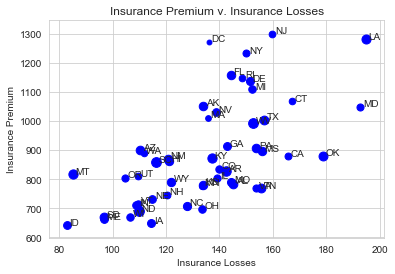

In [22]:
sns.set_style('whitegrid')
x = np.array(df_car_crashes['ins_losses'])
y = np.array(df_car_crashes['ins_premium'])
types = np.array(df_car_crashes.index)

for i,type in enumerate(types):
    xi = x[i]
    yi = y[i]
    plt.scatter(xi, yi, s = 4*df_car_crashes.total[i], color = 'blue')
    plt.text(xi+1, yi+1, type, fontsize = 10)

plt.title("Insurance Premium v. Insurance Losses")
plt.ylabel("Insurance Premium")
plt.xlabel("Insurance Losses")
plt.show()

### 20) [P] Generate two interesting scatterplots that show some relationships between variables in the data. Try to use as many variables as you can without creating chaos! Your aim is to derive meaning from your data. Good visualizations tell a story. Strive to use at least one additional variable as size, color, or shape in your data, so you can show more than just 2 variables on a single plot. Remember, sometimes this can just confuse, so do not go overboard unless it really adds something. Be sure to add legends and colorbors and axis labels and titles, and etc!
Then, write a single sentence in markdown that draws a conclusion from your plot.

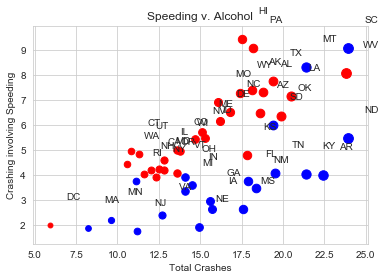

In [23]:
sns.set_style('whitegrid')
x = np.array(df_car_crashes['total'])
y = np.array(df_car_crashes['speeding'])
types = np.array(df_car_crashes.index)

for i,type in enumerate(types):
    xi = x[i]
    yi = y[i]
    if (df_car_crashes.alcohol[i] > df_car_crashes.speeding[i]):
        plt.scatter(xi, yi, s = 4*df_car_crashes.total[i], color = 'blue')
    else:
        plt.scatter(xi, yi, s = 4*df_car_crashes.total[i], color = 'red')
    plt.text(xi+1, yi+1, type, fontsize = 10)

plt.title("Speeding v. Alcohol")
plt.ylabel("Crashing involving Speeding")
plt.xlabel("Total Crashes")
plt.show()

The red dots are the states where speeding involved crashes are greater than the percentage of alcohol induced crashes. The blue states generally have less speeding crashes. Both red and blue states seems to have an equal number of total crashes. 

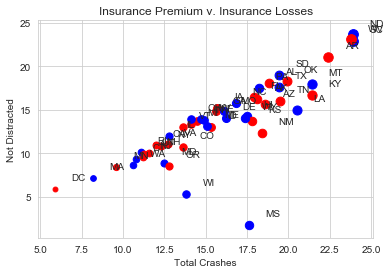

In [24]:
sns.set_style('whitegrid')
x = np.array(df_car_crashes['total'])
y = np.array(df_car_crashes['not_distracted'])
types = np.array(df_car_crashes.index)

for i,type in enumerate(types):
    xi = x[i]
    yi = y[i]
    if (df_car_crashes.alcohol[i]/df_car_crashes.total[i] > .30):
        plt.scatter(xi, yi, s = 4*df_car_crashes.total[i], color = 'blue')
    else:
        plt.scatter(xi, yi, s = 4*df_car_crashes.total[i], color = 'red')

    plt.text(xi+1, yi+1, type, fontsize = 10)

plt.title("Insurance Premium v. Insurance Losses")
plt.ylabel("Not Distracted")
plt.xlabel("Total Crashes")
plt.show()

### 21) [P] Since all of the data are numeric, create a zscore transformation, storing the new dataframe as df_car_crashes_zscore. Report summary statistics on the transformed data.

In [25]:
from scipy.stats import zscore

In [26]:
df_car_crashes_zscore = df_car_crashes.apply(zscore)
df_car_crashes_zscore.describe()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
mean,6.117111e-16,1.741526e-17,-1.447644e-16,-3.434072e-16,3.025902e-16,4.506199e-16,-2.111601e-16
std,1.009950e+00,1.009950e+00,1.009950e+00,1.009950e+00,1.009950e+00,1.009950e+00,1.009950e+00
min,-2.423242e+00,-1.604809e+00,-1.923831e+00,-2.645993e+00,-2.174301e+00,-1.387777e+00,-2.104130e+00
25%,-7.448923e-01,-6.165054e-01,-5.798646e-01,-6.932781e-01,-7.127632e-01,-6.713940e-01,-8.071227e-01
50%,-4.660081e-02,-1.953063e-01,-1.943724e-01,6.357267e-02,-6.167066e-02,-1.585346e-01,6.330968e-02
75%,6.639414e-01,7.211710e-01,4.189107e-01,5.749341e-01,7.377755e-01,6.853269e-01,7.066285e-01
max,1.987020e+00,2.228278e+00,3.008718e+00,2.259537e+00,1.951700e+00,2.348268e+00,2.451560e+00


### 22) [P] Now, run a full PCA on the transformed data. Set n_components to be the same number of components as the original data. Be sure to fit the data to your PCA model, and then output the components, explained variance, and the explained variance ratio.

In [27]:
from sklearn.decomposition import PCA

In [28]:
n_components = df_car_crashes.count(axis = 1).max()
pca = PCA(n_components)
principle_components = pca.fit_transform(df_car_crashes_zscore)
df_principle = pd.DataFrame(principle_components, columns = ['principal_component_'+str(i) for i in range(n_components)])
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[4.0942308  1.6095732  0.56161403 0.35753958 0.2863854  0.20263316
 0.02802383]
[0.57342168 0.22543042 0.07865743 0.05007557 0.04011    0.02837999
 0.00392491]


### 23) [M] Use your intuition – what do the weights of the first couple of components suggest explains most of the variance in the data?

principal_component_0 has a ratio of 57%, how much the variance is explained by that one variable. 

### 24) [P] Create a plot of the cumulative sum of the explained variance. How many components will get you to 90% of the explained variance?

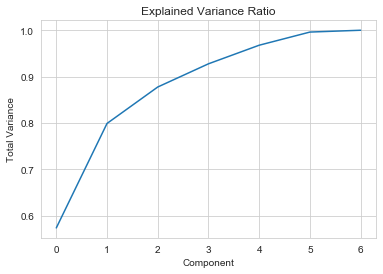

In [29]:
sns.lineplot(data=np.cumsum(pca.explained_variance_ratio_))
plt.title("Explained Variance Ratio")
plt.ylabel("Total Variance")
plt.xlabel("Component")
plt.show()
plt.show()
# I will get to 90% explained variance by the 4th component

### 25) [P] Transform the original data using your PCA model (i.e. using the transform function of the pca object.)
(NOTE: I often just store the transformed data temporarily as some arbitrary variable to make it easier to manipulate the data for plotting.)

In [30]:
pca_original = pd.DataFrame(pca.transform(df_car_crashes))
pca_original.head()

,0,1,2,3,4,5,6
0,-83.685843,645.224379,157.332867,427.845168,18.061271,-71.460871,31.655088
1,-118.767135,821.594240,228.898421,610.816741,31.770225,-106.500757,41.824503
2,-96.666820,699.301439,194.614568,524.678357,27.960893,-92.694757,36.034679
3,-84.355396,673.357448,162.979764,459.725291,20.222071,-79.507726,32.377070
4,-107.990346,722.676028,177.359394,475.889641,23.626185,-77.006485,33.250672


### 26) [P] Generate a 2D plot using the first two principal components as your x and y coordinates. Be sure to label each point, and label your axes as component 1 and component 2, respectively.

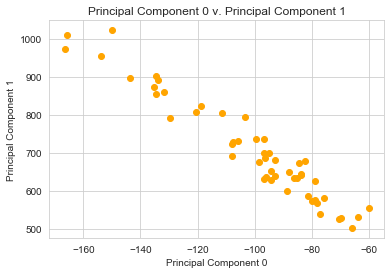

In [31]:
sns.set_style('whitegrid')
x = np.array(pca_original[0])
y = np.array(pca_original[1])
types = np.array(pca_original.index)
plt.scatter(x, y, color = 'orange')

plt.title("Principal Component 0 v. Principal Component 1")
plt.ylabel("Principal Component 1")
plt.xlabel("Principal Component 0")
plt.show()

### 27) [M] Observe your plot, and report three "interesting" states from your data that represent some extreme values or outliers from the trends.

No outliers?

### 28) [P] Read how to generate a 3D scatterplot, and use it to generate a scatterplot of the first 3 components.

In [32]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random

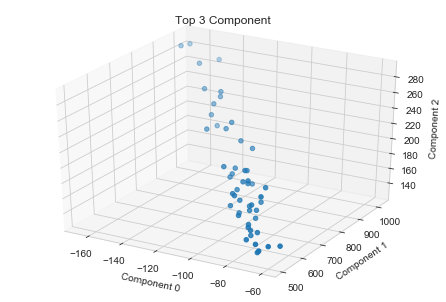

In [33]:
fig = pyplot.figure()
ax = Axes3D(fig)
x = np.array(pca_original[0])
y = np.array(pca_original[1])
z = np.array(pca_original[2])

ax.set_xlabel('Component 0')
ax.set_ylabel('Component 1')
ax.set_zlabel('Component 2')
ax.set_title("Top 3 Component")
ax.scatter(x, y, z)
pyplot.show()

### 29) [M] Do the same outliers still stand out?

Still no outliers...